In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(18813823)
n_sim = 50
rv = stats.poisson(mu=5.0)
sample = rv.rvs(size=n_sim)
df_unitary = pd.DataFrame({"id": np.arange(len(sample)), "value": sample})
sample_weight = stats.randint.rvs(0, 300, size=df_unitary.shape[0])
df_unitary.head()

,id,value
0,0,4
1,1,4
2,2,3
3,3,2
4,4,7


In [2]:
# analytical definition of Lorenz curve
from scipy.integrate import quad

alpha = np.linspace(0, 1, 100)

def f2int(x):
    return rv.ppf(x)

res = [1 / rv.mean() * quad(f2int, a=0, b=el)[0] for el in alpha]

/tmp/ipykernel_1577/3065656947.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res = [1 / rv.mean() * quad(f2int, a=0, b=el)[0] for el in alpha]


In [3]:
X_resampled_by_weights = np.repeat(df_unitary.values, sample_weight, axis=0)
df_weighted = pd.DataFrame(
    {
        "id": df_unitary["id"].values,
        "weight": sample_weight,
        "value": sample,
    }
)
df_unitary = pd.DataFrame(
    {
        "id": X_resampled_by_weights[:, 0],
        "weight": 1,
        "value": X_resampled_by_weights[:, 1],
    }
)
display(df_weighted)
display(df_unitary)

,id,weight,value
0,0,147,4
1,1,250,4
2,2,18,3
3,3,22,2
4,4,118,7
5,5,47,3
6,6,142,5
7,7,24,2
8,8,298,5
9,9,291,6


,id,weight,value
0,0,1,4
1,0,1,4
2,0,1,4
3,0,1,4
4,0,1,4
...,...,...,...
8050,49,1,3
8051,49,1,3
8052,49,1,3
8053,49,1,3


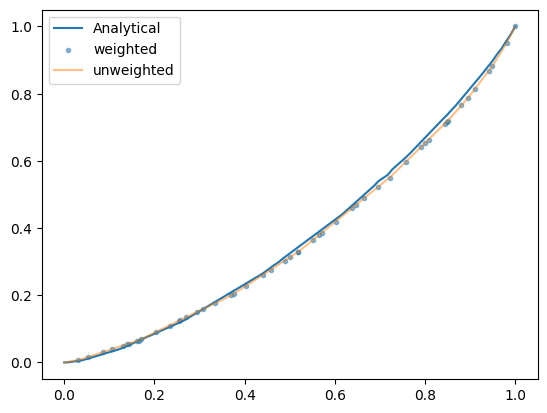

In [4]:
def lorenz_curve(frequency, exposure, weighted=True):
    ranking = np.argsort(frequency)
    ranked_frequencies = frequency[ranking]
    ranked_exposure = exposure[ranking]
    cumulated_claims = np.cumsum(ranked_frequencies * ranked_exposure)
    cumulated_claims = cumulated_claims / cumulated_claims[-1]
    if weighted:
        cumulated_exposure = np.cumsum(ranked_exposure)
        cumulated_exposure = cumulated_exposure / cumulated_exposure[-1]
        plt.scatter(
            cumulated_exposure,
            cumulated_claims,
            marker=".",
            alpha=0.5,
            label="weighted",
        )
    else:
        cumulated_exposure = np.linspace(0, 1, len(frequency))
        plt.plot(
            cumulated_exposure,
            cumulated_claims,
            alpha=0.5,
            label="unweighted",
        )
    return cumulated_exposure, cumulated_claims


plt.plot(alpha, res, label="Analytical")
res_weighted = lorenz_curve(df_weighted["value"].values, df_weighted["weight"].values)
res_unitary = lorenz_curve(
    df_unitary["value"].values, df_unitary["weight"].values, False
)
plt.legend();